<a href="https://colab.research.google.com/github/vitorsr/ccd/blob/master/baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Baseline

Este Notebook tem como objetivo a realização de um pré-processamento dos dados a serem utilizados de forma a permitir a obtenção de dois resultados para análise:


*   Diferença dos Dados de Agosto de 2019 com relação a um Baseline Histórico (Dados de 1970 a 2018);
*   Projeção dos Dados do dia 19 de Agosto de 2019 em um Sistema PCA calculado com base em todos os dados disponíveis

Para isso, foram utilizados dois Datasets:


*   Dataset com Dados Metereológicos entre os Anos de 1970 a 2018, fornecidos como dados principais da Competição;
*   Dataset com Dados Metereológicos de 2019, da mesma fonte dos dados anteriores;

Os resultados gerados aqui, a partir do uso da biblioteca Pandas, foram utilizados em outros Notebooks do Repositório para uma devida visualização dos resultados em Mapas.





## Bibliotecas Utilizadas

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Extração de Dados

Extração dos Dados Históricos (1970-2018):

In [2]:
!wget -q -O ccd_2019.zip https://www.dropbox.com/s/7rriacb7c6vzf3m/ccd_2019.zip

!unzip ccd_2019.zip

Archive:  ccd_2019.zip
replace bdmep_meta.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


Extração dos Dados de 2019:

In [3]:
!wget "https://onedrive.live.com/download?cid=BCBADB0836C97273&resid=BCBADB0836C97273%21115485&authkey=AJlb41BWz0YiBd8" -O 2019.zip
!unzip 2019.zip

--2019-10-29 23:02:47--  https://onedrive.live.com/download?cid=BCBADB0836C97273&resid=BCBADB0836C97273%21115485&authkey=AJlb41BWz0YiBd8
Resolving onedrive.live.com (onedrive.live.com)... 13.107.42.13
Connecting to onedrive.live.com (onedrive.live.com)|13.107.42.13|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://c9quda.bn.files.1drv.com/y4mMptOcW79YXWTGWZ3CqE4a8euugSIOX2eHzJTVKh8Sw1Vj1caC89931VNBfV4sCC295lRu6U2erzC1POIPnZUSoNi5cmMFY6loqZP3N1r53PzLHB17FDyA6SJTjavp1idr27lVntyjxeg-N4QA0JtCa__JxxCzt2-oLh2afdm85r1LHNICcsPZWuMUcp43bAI_h8ZkhluwAGG0Wo6h_Ov9Q/2019.zip?download&psid=1 [following]
--2019-10-29 23:02:47--  https://c9quda.bn.files.1drv.com/y4mMptOcW79YXWTGWZ3CqE4a8euugSIOX2eHzJTVKh8Sw1Vj1caC89931VNBfV4sCC295lRu6U2erzC1POIPnZUSoNi5cmMFY6loqZP3N1r53PzLHB17FDyA6SJTjavp1idr27lVntyjxeg-N4QA0JtCa__JxxCzt2-oLh2afdm85r1LHNICcsPZWuMUcp43bAI_h8ZkhluwAGG0Wo6h_Ov9Q/2019.zip?download&psid=1
Resolving c9quda.bn.files.1drv.com (c9quda.bn.files.1drv.com)... 1

In [0]:
directory = '2019'
files = []
for filename in os.listdir(directory):
    if filename.endswith(".csv"): 
        files.append(filename)
        continue
    else:
        continue

In [5]:
df_2019 = pd.DataFrame()
for file in files:
    df_aux = pd.read_csv(directory+'/'+file, delimiter=',')
    df_2019 = pd.concat([df_aux, df_2019], sort=True)
id_2019 = pd.unique(df_2019['id'])
id_2019

array([82487, 82768, 83013, 82578, 82990, 83442, 82590, 82113, 83632,
       83437, 83393, 82476, 82382, 82181, 83744, 82353, 83676, 82994,
       83114, 83479, 82198, 82686, 82263, 83964, 82460, 82983, 83985,
       83483, 83980, 83236, 82777, 82317, 82659, 82280, 82493, 82246,
       82992, 83007, 83192, 83309, 82996, 83488, 83736, 83842, 82596,
       82610, 83789, 82533, 83249, 82598, 83698, 83813, 82792, 82326,
       83182, 83064, 83334, 82807, 82445, 82178, 83936, 83995, 83897,
       83630, 82863, 83766, 83851, 82795, 83076, 83919, 82586, 83648,
       82975, 82797, 82145, 83592, 83692, 82676, 83669, 82689, 83589,
       82784, 82098, 83033, 82106, 83737, 83338, 82392, 83714, 82397,
       83242, 82212, 83498, 82765, 82410, 83587, 83726, 83190, 83577,
       82693, 82191, 83683, 83376, 82188, 82915, 83288, 82571, 82780,
       82723, 83235, 83927, 83097, 83907, 83522, 82886, 83536, 83811,
       82882, 83386, 83767, 82564, 83805, 83718, 83967, 83377, 83916,
       82890, 83696,

Descrição dos Datasets

<br><b>variável | descrição | unidade </b></br>
<br>date | data e hora da coleta             -
<br> id | ID da estação de coleta             -
<br>prec | precipitação |       mm
<br>tair | temperatura do ar  | graus Celsius
<br>tw | temperatura de bulbo úmido |  graus Celsius
<br>tmax | temperatura máxima do ar  | graus Celsius
<br>tmin | temperatura mínima do ar  | graus Celsius
<br>urmax | umidade relativa máxima  |             %
<br>patm | pressão atmosférica         |    hPa
<br>pnmm | pressão atmosférica média ao nível do mar  |           hPa
<br>wd | direção do vento        |   graus
<br>wsmax  |  rajadas de vento    |         m/s
<br>n |  horas de sol          |     h
<br>cc |   cobertura de nuvens    |           -
<br>evap  |   evaporação        |      mm
<br>ur  |   umidade relativa          |     %
<br>ws   |   velocidade do vento       |      m/s

Head do Dataset Histórico:


In [6]:
df = pd.read_csv("inmetr.csv")
df.head()

,date,id,prec,tair,tw,tmax,tmin,urmax,patm,pnmm,wd,wsmax,n,cc,evap,ur,ws
0,1970-05-04 00:00:00,83010,NaN,NaN,NaN,32.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.75,NaN
1,1970-05-04 12:00:00,83010,NaN,25.3,24.0,NaN,23.7,90.0,1005.9,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN
2,1970-05-04 18:00:00,83010,NaN,29.2,27.1,NaN,NaN,85.0,1004.2,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
3,1970-05-05 00:00:00,83010,NaN,25.0,27.0,32.6,NaN,92.0,1007.5,NaN,NaN,NaN,NaN,8.0,2.4,88.25,NaN
4,1970-05-05 12:00:00,83010,0.0,25.9,24.8,NaN,23.0,91.0,1006.4,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN


Head do Dataset de 2019:

In [7]:
df_m = pd.read_csv("bdmep_meta.csv")
df_m.head()

,id,lon,lat,alt,name,state,uf,time_zone,offset_utc,time_zone.1,offset_utc.1
0,83010,-68.733333,-11.016667,260.00,Brasiléia,Acre,AC,America/Rio_Branco,-5,America/Rio_Branco,-5
1,82704,-72.666667,-7.633333,170.00,Cruzeiro do Sul,Acre,AC,America/Rio_Branco,-5,America/Rio_Branco,-5
2,82915,-67.800000,-9.966667,160.00,Rio Branco,Acre,AC,America/Rio_Branco,-5,America/Rio_Branco,-5
3,82807,-70.766667,-8.166667,190.00,Tarauacá,Acre,AC,America/Rio_Branco,-5,America/Rio_Branco,-5
4,83098,-36.166667,-10.150000,56.13,Coruripe,Alagoas,AL,America/Maceio,-3,America/Maceio,-3


## Processamento de Dados Históricos (Baseline)

Os dados apresentados abragem o período entre os anos de 1970 e 2018.

Filtrando apenas para o Mês de Agosto:

In [8]:
mask = (df['date'].str.split('-',n=2,expand = True)[1]=='08')
df = df.loc[mask]
df.size

20944306

Filtrando apenas as Estações ainda Existentes em 2019:

In [9]:
mask = (df['id'].isin(id_2019))
df = df.loc[mask]
df.size

13499360

Extraindo o Ano da Coluna Date:

In [10]:
df['date'] = df['date'].str.split('-',n=1,expand = True)[1]
df.head()

,date,id,prec,tair,tw,tmax,tmin,urmax,patm,pnmm,wd,wsmax,n,cc,evap,ur,ws
53402,08-01 00:00:00,82915,NaN,25.0,22.8,35.0,NaN,84.0,1010.6,NaN,NaN,NaN,5.6,4.0,3.2,74.75,0.0
53403,08-01 12:00:00,82915,0.0,22.2,21.6,NaN,19.7,94.0,1000.6,NaN,0.0,0.0,NaN,7.0,NaN,NaN,NaN
53404,08-01 18:00:00,82915,NaN,33.8,27.0,NaN,NaN,57.0,999.2,NaN,0.0,0.0,NaN,7.0,NaN,NaN,NaN
53405,08-02 00:00:00,82915,NaN,26.8,24.8,33.8,NaN,74.0,996.6,NaN,NaN,NaN,3.5,6.0,2.1,83.50,NaN
53406,08-02 12:00:00,82915,21.9,11.8,11.0,NaN,11.2,90.0,1009.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN


Extraindo a Hora de Medição da Coluna Date:

In [0]:
df['date'] = df['date'].str.split(' ',n=1,expand = True)[0]
df.head()
df_pre_gp = df #Extraindo para utilização no Cálculo do PCA

Group By por Data e Estação com operação de Média:

In [12]:
df = df.groupby(by=['date','id']).mean()
df.head(1000)

prec       tair         tw  ...      evap         ur        ws
date  id                                     ...                               
08-01 82024  6.219512  27.235246  24.882883  ...  2.597143  84.051471  1.025690
      82042  4.133333  26.858163  24.436145  ...  2.345455  83.840000  0.467799
      82098  3.716327  28.204027  25.416779  ...  2.765306  81.761364  1.290667
      82106  4.888889  25.806329  24.044521  ...  1.298000  88.738372  1.182592
      82113  6.386538  26.638000  24.857746  ...  1.847368  87.191860  1.266859
...               ...        ...        ...  ...       ...        ...       ...
08-06 82336  3.765116  28.311024  25.521930  ...  3.527778  80.323529  1.007813
      82353  1.214815  28.338961  24.939610  ...  2.410870  77.088889  1.326016
      82361  1.113953  28.308462  25.276378  ...  3.400000  78.694444  1.404924
      82376  0.081395  28.585217  24.247826  ...  4.674419  72.789474  2.037037
      82382  0.159524  28.420909  23.314545  ...  5.735714  68.409722  2.142157

[1000 rows x 15 columns]

## Processamento de Dados Atuais

Dados de 2019:

In [13]:
df_2019.head()

,cc,date,evap,id,n,patm,pnmm,prec,request_status,tair,tmax,tmin,tw,ur,urmax,wd,ws,wsmax
0,3.75,2019-01-01T00:00:00Z,-9999.0,82487,5.3,-9999.0,1012.4,-9999.0,Success: (200) OK,20.9,28.8,-9999.0,-9999.0,75.5,85,5,3.08664,3.08664
1,10.00,2019-01-01T12:00:00Z,-9999.0,82487,-9999.0,919.0,1014.7,0.0,Success: (200) OK,21.3,-9999.0,19.7,-9999.0,-9999.0,91,9,-9999.00000,3.08664
2,6.25,2019-01-01T18:00:00Z,-9999.0,82487,-9999.0,916.7,1011.1,-9999.0,Success: (200) OK,27.3,-9999.0,-9999.0,-9999.0,-9999.0,57,9,-9999.00000,3.08664
3,3.75,2019-01-02T00:00:00Z,-9999.0,82487,5.5,918.5,1013.9,-9999.0,Success: (200) OK,21.7,28.2,-9999.0,-9999.0,79.5,77,9,3.08664,3.08664
4,10.00,2019-01-02T12:00:00Z,-9999.0,82487,-9999.0,919.2,1014.7,0.0,Success: (200) OK,20.9,-9999.0,19.7,-9999.0,-9999.0,91,9,-9999.00000,3.08664


Removendo coluna de Status de Request:

In [14]:
df_2019 = df_2019.drop(['request_status'],axis=1)
df_2019.head()

,cc,date,evap,id,n,patm,pnmm,prec,tair,tmax,tmin,tw,ur,urmax,wd,ws,wsmax
0,3.75,2019-01-01T00:00:00Z,-9999.0,82487,5.3,-9999.0,1012.4,-9999.0,20.9,28.8,-9999.0,-9999.0,75.5,85,5,3.08664,3.08664
1,10.00,2019-01-01T12:00:00Z,-9999.0,82487,-9999.0,919.0,1014.7,0.0,21.3,-9999.0,19.7,-9999.0,-9999.0,91,9,-9999.00000,3.08664
2,6.25,2019-01-01T18:00:00Z,-9999.0,82487,-9999.0,916.7,1011.1,-9999.0,27.3,-9999.0,-9999.0,-9999.0,-9999.0,57,9,-9999.00000,3.08664
3,3.75,2019-01-02T00:00:00Z,-9999.0,82487,5.5,918.5,1013.9,-9999.0,21.7,28.2,-9999.0,-9999.0,79.5,77,9,3.08664,3.08664
4,10.00,2019-01-02T12:00:00Z,-9999.0,82487,-9999.0,919.2,1014.7,0.0,20.9,-9999.0,19.7,-9999.0,-9999.0,91,9,-9999.00000,3.08664


Substituindo Valores Inválidos (-9999.0):

In [15]:
df_2019 = df_2019.replace(-9999.0,np.nan)
df_2019.head()

,cc,date,evap,id,n,patm,pnmm,prec,tair,tmax,tmin,tw,ur,urmax,wd,ws,wsmax
0,3.75,2019-01-01T00:00:00Z,NaN,82487,5.3,NaN,1012.4,NaN,20.9,28.8,NaN,NaN,75.5,85.0,5.0,3.08664,3.08664
1,10.00,2019-01-01T12:00:00Z,NaN,82487,NaN,919.0,1014.7,0.0,21.3,NaN,19.7,NaN,NaN,91.0,9.0,NaN,3.08664
2,6.25,2019-01-01T18:00:00Z,NaN,82487,NaN,916.7,1011.1,NaN,27.3,NaN,NaN,NaN,NaN,57.0,9.0,NaN,3.08664
3,3.75,2019-01-02T00:00:00Z,NaN,82487,5.5,918.5,1013.9,NaN,21.7,28.2,NaN,NaN,79.5,77.0,9.0,3.08664,3.08664
4,10.00,2019-01-02T12:00:00Z,NaN,82487,NaN,919.2,1014.7,0.0,20.9,NaN,19.7,NaN,NaN,91.0,9.0,NaN,3.08664


Segue-se agora o mesmo Processo feito para os Dados Históricos.

Filtrando apenas para o Mês de Agosto:

In [0]:
mask = (df_2019['date'].str.split('-',n=2,expand = True)[1]=='08')
df_2019 = df_2019.loc[mask]


Os Dados aqui já contém naturalmente apenas Estações Existentes em 2019.

O Ano também já é naturalmente o de 2019, mas seu valor será extraído para fins de padronização.

In [17]:
df_2019['date'] = df_2019['date'].str.split('-',n=1,expand = True)[1]
df_2019.head()

,cc,date,evap,id,n,patm,pnmm,prec,tair,tmax,tmin,tw,ur,urmax,wd,ws,wsmax
573,6.25,08-01T00:00:00Z,NaN,82487,6.4,919.4,1015.8,NaN,19.9,25.2,NaN,NaN,87.50,95.0,9.0,3.25812,3.08664
574,10.00,08-01T12:00:00Z,NaN,82487,NaN,919.1,1015.5,0.0,19.3,NaN,17.5,NaN,NaN,92.0,9.0,NaN,3.60108
575,5.00,08-01T18:00:00Z,NaN,82487,NaN,916.6,1011.9,NaN,25.1,NaN,NaN,NaN,NaN,68.0,5.0,NaN,3.08664
576,10.00,08-02T00:00:00Z,NaN,82487,6.3,918.3,1014.6,NaN,20.1,25.6,NaN,NaN,87.75,95.0,5.0,3.08664,3.08664
577,10.00,08-02T12:00:00Z,NaN,82487,NaN,919.3,1015.7,0.0,19.3,NaN,17.9,NaN,NaN,93.0,9.0,NaN,3.08664


Extraindo a Hora de Medição da Coluna Date:

In [0]:
df_2019['date'] = df_2019['date'].str.split('T',n=1,expand = True)[0]
df_2019.head()
df_2019_pre_gp = df_2019 #Extraindo para utilização no Cálculo do PCA

Group By por Data e Estação com operação de Média:

In [19]:
df_2019 = df_2019.groupby(by=['date','id']).mean()
df_2019.head(1000)

cc  evap     n  ...         wd        ws     wsmax
date  id                            ...                               
08-01 82024   6.250000   NaN   9.6  ...  11.500000  0.514440  0.514440
      82098   6.333333   3.7   8.9  ...   7.666667  1.666667  2.000000
      82106   9.000000   NaN   NaN  ...   4.500000  0.514440  0.514440
      82141   5.000000   0.3  10.5  ...  14.333333  2.733333  2.733333
      82145   4.333333   1.0   9.8  ...  15.000000  0.533333  0.533333
...                ...   ...   ...  ...        ...       ...       ...
08-06 83565   9.666667   2.2   2.5  ...  11.000000  1.333333  2.000000
      83579   6.333333   4.2   0.5  ...        NaN       NaN       NaN
      83587   9.000000   4.7   1.3  ...   7.666667  2.600000  2.700000
      83589  10.000000   3.9   NaN  ...        NaN       NaN       NaN
      83592   8.333333   3.4   0.1  ...  14.000000  1.666667  1.333333

[1000 rows x 15 columns]

## Cálculo da Diferença com Relação ao Baseline

Head do Dataset Histórico (Baseline):

In [20]:
df.head()

prec       tair         tw  ...      evap         ur        ws
date  id                                     ...                               
08-01 82024  6.219512  27.235246  24.882883  ...  2.597143  84.051471  1.025690
      82042  4.133333  26.858163  24.436145  ...  2.345455  83.840000  0.467799
      82098  3.716327  28.204027  25.416779  ...  2.765306  81.761364  1.290667
      82106  4.888889  25.806329  24.044521  ...  1.298000  88.738372  1.182592
      82113  6.386538  26.638000  24.857746  ...  1.847368  87.191860  1.266859

[5 rows x 15 columns]

Head do Dataset de 2019:

In [21]:
df_2019.head()

cc  evap     n  ...         wd        ws     wsmax
date  id                           ...                               
08-01 82024  6.250000   NaN   9.6  ...  11.500000  0.514440  0.514440
      82098  6.333333   3.7   8.9  ...   7.666667  1.666667  2.000000
      82106  9.000000   NaN   NaN  ...   4.500000  0.514440  0.514440
      82141  5.000000   0.3  10.5  ...  14.333333  2.733333  2.733333
      82145  4.333333   1.0   9.8  ...  15.000000  0.533333  0.533333

[5 rows x 15 columns]

Para calcular a diferença entre os Dados de 2019 e o Baseline, vamos realizar um Merge Horizontal entre os dois Datasets e subtrair as colunas equivalentes uma da outra:

In [22]:
df_merged = pd.merge(df_2019,df,on=['date','id'])
df_merged.head()

cc_x  evap_x   n_x  ...    evap_y       ur_y      ws_y
date  id                             ...                               
08-01 82024  6.250000     NaN   9.6  ...  2.597143  84.051471  1.025690
      82098  6.333333     3.7   8.9  ...  2.765306  81.761364  1.290667
      82106  9.000000     NaN   NaN  ...  1.298000  88.738372  1.182592
      82141  5.000000     0.3  10.5  ...  2.694444  79.305000  2.241212
      82145  4.333333     1.0   9.8  ...  2.139535  85.653846  1.192929

[5 rows x 30 columns]

In [0]:
diff = pd.DataFrame()
measures = ['tair','tmax','tmin','tw']
for column in measures:
  diff[column] =  abs(df_merged[column+'_x'] - df_merged[column+'_y'])

Head do Resultado (diff):

In [24]:
diff.head(1000)

tair      tmax      tmin        tw
date  id                                           
08-01 82024  3.135246  2.330769  1.400000  1.482883
      82098  1.862640  1.224000  2.968000  0.983221
      82106  0.256329  0.103704  0.892453  1.455479
      82141  1.204618  0.666038  3.034615  0.761078
      82145  0.789368  1.067500  1.788372  0.633046
...               ...       ...       ...       ...
08-06 83565  4.729023  7.289189       NaN  0.195942
      83579  3.758156       NaN  0.853191  1.361594
      83587  2.410766  4.507407  0.800000  0.806329
      83589  0.210173  3.923077  4.930769  1.080313
      83592  0.192402  2.373913  2.275556  0.013784

[1000 rows x 4 columns]

Algoritmos para Download do Resultado em formato.csv:

In [0]:
#diff.to_csv('./diff_temp.csv')

In [0]:
from google.colab import files
#files.download('diff_temp.csv')

## Cálculo de PCA

Dataset do Baseline pré-processado, sem Group By:

In [27]:
df_pre_gp.head()

,date,id,prec,tair,tw,tmax,tmin,urmax,patm,pnmm,wd,wsmax,n,cc,evap,ur,ws
53402,08-01,82915,NaN,25.0,22.8,35.0,NaN,84.0,1010.6,NaN,NaN,NaN,5.6,4.0,3.2,74.75,0.0
53403,08-01,82915,0.0,22.2,21.6,NaN,19.7,94.0,1000.6,NaN,0.0,0.0,NaN,7.0,NaN,NaN,NaN
53404,08-01,82915,NaN,33.8,27.0,NaN,NaN,57.0,999.2,NaN,0.0,0.0,NaN,7.0,NaN,NaN,NaN
53405,08-02,82915,NaN,26.8,24.8,33.8,NaN,74.0,996.6,NaN,NaN,NaN,3.5,6.0,2.1,83.50,NaN
53406,08-02,82915,21.9,11.8,11.0,NaN,11.2,90.0,1009.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN


Dataset de 2019 pré-processado, sem Group By:

In [28]:
df_2019_pre_gp.head()

,cc,date,evap,id,n,patm,pnmm,prec,tair,tmax,tmin,tw,ur,urmax,wd,ws,wsmax
573,6.25,08-01,NaN,82487,6.4,919.4,1015.8,NaN,19.9,25.2,NaN,NaN,87.50,95.0,9.0,3.25812,3.08664
574,10.00,08-01,NaN,82487,NaN,919.1,1015.5,0.0,19.3,NaN,17.5,NaN,NaN,92.0,9.0,NaN,3.60108
575,5.00,08-01,NaN,82487,NaN,916.6,1011.9,NaN,25.1,NaN,NaN,NaN,NaN,68.0,5.0,NaN,3.08664
576,10.00,08-02,NaN,82487,6.3,918.3,1014.6,NaN,20.1,25.6,NaN,NaN,87.75,95.0,5.0,3.08664,3.08664
577,10.00,08-02,NaN,82487,NaN,919.3,1015.7,0.0,19.3,NaN,17.9,NaN,NaN,93.0,9.0,NaN,3.08664


Cocatenando os dois Dataframes Verticalmente:

In [29]:
X = pd.concat([df_pre_gp,df_2019_pre_gp])
X

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,cc,date,evap,id,n,patm,pnmm,prec,tair,tmax,tmin,tw,ur,urmax,wd,ws,wsmax
53402,4.00,08-01,3.2,82915,5.6,1010.6,NaN,NaN,25.0,35.0,NaN,22.8,74.75,84.0,NaN,0.00000,NaN
53403,7.00,08-01,NaN,82915,NaN,1000.6,NaN,0.0,22.2,NaN,19.7,21.6,NaN,94.0,0.0,NaN,0.00000
53404,7.00,08-01,NaN,82915,NaN,999.2,NaN,NaN,33.8,NaN,NaN,27.0,NaN,57.0,0.0,NaN,0.00000
53405,6.00,08-02,2.1,82915,3.5,996.6,NaN,NaN,26.8,33.8,NaN,24.8,83.50,74.0,NaN,NaN,NaN
53406,8.00,08-02,NaN,82915,NaN,1009.0,NaN,21.9,11.8,NaN,11.2,11.0,NaN,90.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,0.00,08-30,NaN,83228,NaN,986.6,1013.8,0.0,29.1,NaN,19.8,NaN,NaN,37.0,9.0,NaN,2.57220
725,1.25,08-30,NaN,83228,NaN,982.0,1008.9,NaN,37.0,NaN,NaN,NaN,NaN,21.0,5.0,NaN,2.05776
726,0.00,08-31,NaN,83228,10.4,983.4,1010.5,NaN,26.2,38.6,NaN,NaN,37.25,52.0,0.0,1.88628,0.00000
727,2.50,08-31,NaN,83228,NaN,986.1,1013.2,0.0,29.7,NaN,19.6,NaN,NaN,35.0,9.0,NaN,3.60108


Realizando um Group By por Date e Id:

In [30]:
X = X.groupby(by=['date','id']).mean()
X

cc      evap         n  ...         wd        ws     wsmax
date  id                                   ...                               
08-01 82024  5.298800  2.597143  5.309091  ...  10.201923  1.013518  1.066496
      82042  5.754639  2.345455  5.860000  ...   3.578947  0.467799  0.445155
      82098  4.719868  2.784000  8.251020  ...   5.738806  1.298039  1.398026
      82106  5.475309  1.298000  4.656250  ...   9.426357  1.170219  1.172522
      82113  3.563333  1.847368  6.700000  ...  13.333333  1.266859  1.276955
...               ...       ...       ...  ...        ...       ...       ...
08-31 83967  5.215839  2.359615  4.674074  ...  15.403727  2.106845  2.140708
      83980  4.631579  3.256000  4.938000  ...  15.546667  3.246771  3.115013
      83985  6.345455  2.354054  5.303571  ...  13.719626  3.071296  2.985981
      83995  4.583942  2.351111  4.742500  ...  15.284672  3.872464  3.355882
      83997  5.543478  2.247826  5.334091  ...  15.731884  4.398374  4.139344

[6045 rows x 15 columns]

Filtrando para dia 19:

In [31]:
X = X.loc['08-19']
X

,cc,evap,n,patm,pnmm,prec,tair,tmax,tmin,tw,ur,urmax,wd,ws,wsmax
id,,,,,,,,,,,,,,,
82024,5.462602,3.236364,5.743333,1001.922857,1011.650000,7.351282,27.880992,32.912821,23.513514,25.115741,81.712121,80.226804,9.639175,1.158565,1.211875
82042,5.805392,2.450000,6.435000,NaN,NaN,4.370968,27.722549,32.533333,22.430303,25.010714,83.115385,82.670886,3.291139,0.670222,0.677841
82098,4.677419,3.148077,8.900000,1010.198639,1011.883333,2.232692,28.639103,32.275000,23.905882,25.633974,79.266304,78.536232,8.355072,1.967949,2.023718
82106,4.884431,1.460784,4.891837,993.564545,1009.966667,8.489474,26.081212,31.462500,21.389091,24.205405,87.139535,86.522727,11.613636,1.193914,1.194979
82113,3.887908,1.776316,5.665909,998.916667,NaN,4.084906,26.689542,32.266667,22.130769,24.909790,86.670455,86.216000,15.712000,1.223741,1.279382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83967,4.875000,1.915094,5.087273,1014.116463,1018.227778,2.505455,17.079878,21.738182,11.756364,14.266456,77.036364,75.018293,13.682927,1.788841,1.815779
83980,4.466667,3.479592,4.420408,991.535811,1017.598148,3.691837,14.524324,19.293750,9.333333,11.719595,72.898936,71.959459,14.864865,3.103401,2.926351
83985,6.428571,2.543243,4.425000,1017.783929,NaN,1.880556,14.941964,19.111429,9.568571,13.271429,85.317568,82.598214,13.747748,3.032432,2.900000


Decompondo Wd em Coordenadas Retangulares:

In [32]:
X['wd'] = X['wd'].multiply(np.pi/180)
X['wd_cos'] = X['wd'].apply(np.cos)
X['wd_sin'] = X['wd'].apply(np.sin)
X = X.drop('wd',axis=1)
X

,cc,evap,n,patm,pnmm,prec,tair,tmax,tmin,tw,ur,urmax,ws,wsmax,wd_cos,wd_sin
id,,,,,,,,,,,,,,,,
82024,5.462602,3.236364,5.743333,1001.922857,1011.650000,7.351282,27.880992,32.912821,23.513514,25.115741,81.712121,80.226804,1.158565,1.211875,0.985882,0.167443
82042,5.805392,2.450000,6.435000,NaN,NaN,4.370968,27.722549,32.533333,22.430303,25.010714,83.115385,82.670886,0.670222,0.677841,0.998351,0.057410
82098,4.677419,3.148077,8.900000,1010.198639,1011.883333,2.232692,28.639103,32.275000,23.905882,25.633974,79.266304,78.536232,1.967949,2.023718,0.989387,0.145307
82106,4.884431,1.460784,4.891837,993.564545,1009.966667,8.489474,26.081212,31.462500,21.389091,24.205405,87.139535,86.522727,1.193914,1.194979,0.979527,0.201311
82113,3.887908,1.776316,5.665909,998.916667,NaN,4.084906,26.689542,32.266667,22.130769,24.909790,86.670455,86.216000,1.223741,1.279382,0.962635,0.270802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83967,4.875000,1.915094,5.087273,1014.116463,1018.227778,2.505455,17.079878,21.738182,11.756364,14.266456,77.036364,75.018293,1.788841,1.815779,0.971620,0.236549
83980,4.466667,3.479592,4.420408,991.535811,1017.598148,3.691837,14.524324,19.293750,9.333333,11.719595,72.898936,71.959459,3.103401,2.926351,0.966534,0.256540
83985,6.428571,2.543243,4.425000,1017.783929,NaN,1.880556,14.941964,19.111429,9.568571,13.271429,85.317568,82.598214,3.032432,2.900000,0.971351,0.237648


Dropando NaN's:


In [33]:
X = X.dropna()
X

,cc,evap,n,patm,pnmm,prec,tair,tmax,tmin,tw,ur,urmax,ws,wsmax,wd_cos,wd_sin
id,,,,,,,,,,,,,,,,
82024,5.462602,3.236364,5.743333,1001.922857,1011.650000,7.351282,27.880992,32.912821,23.513514,25.115741,81.712121,80.226804,1.158565,1.211875,0.985882,0.167443
82098,4.677419,3.148077,8.900000,1010.198639,1011.883333,2.232692,28.639103,32.275000,23.905882,25.633974,79.266304,78.536232,1.967949,2.023718,0.989387,0.145307
82106,4.884431,1.460784,4.891837,993.564545,1009.966667,8.489474,26.081212,31.462500,21.389091,24.205405,87.139535,86.522727,1.193914,1.194979,0.979527,0.201311
82141,3.233333,2.994444,8.546296,1011.428000,1011.285417,2.443103,28.552976,31.315385,24.628302,25.534524,79.020000,77.751678,2.504242,2.607273,0.988185,0.153267
82145,4.627119,2.321951,8.109524,1008.248980,1012.557407,2.313953,27.269565,31.854054,20.870000,25.053913,85.901316,83.686957,1.151111,1.117582,0.994602,0.103765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83964,4.283688,2.297872,5.029787,968.835461,1018.205556,1.708511,14.759859,19.414894,9.957447,11.925352,74.367021,71.816901,1.748672,1.886883,0.958697,0.284431
83967,4.875000,1.915094,5.087273,1014.116463,1018.227778,2.505455,17.079878,21.738182,11.756364,14.266456,77.036364,75.018293,1.788841,1.815779,0.971620,0.236549
83980,4.466667,3.479592,4.420408,991.535811,1017.598148,3.691837,14.524324,19.293750,9.333333,11.719595,72.898936,71.959459,3.103401,2.926351,0.966534,0.256540


Configurando Algoritmo de Normalização e PCA:

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [0]:
sc = StandardScaler()
pca = PCA(n_components=3)

Guardando index de X:

In [0]:
index = X.index

Calculando PCA:

In [0]:
X = sc.fit_transform(X.values)
pca_values = pca.fit_transform(X)

In [38]:
pca_values = pd.DataFrame(pca_values)
pca_values

,0,1,2
0,0.041286,4.500024,-0.797471
1,-1.555133,3.488031,0.065955
2,1.169083,4.503105,-0.881481
3,-1.684043,3.227437,0.683155
4,-0.972034,3.923929,-1.535067
...,...,...,...
163,4.363965,-1.790542,-1.158680
164,3.640791,0.002124,-1.084213
165,4.465704,-1.457392,0.109036
166,4.963034,-0.145945,0.033667


Concatenando Latitude e Longitude:


In [39]:
pca_values.index = index
pca_values

,0,1,2
id,,,
82024,0.041286,4.500024,-0.797471
82098,-1.555133,3.488031,0.065955
82106,1.169083,4.503105,-0.881481
82141,-1.684043,3.227437,0.683155
82145,-0.972034,3.923929,-1.535067
...,...,...,...
83964,4.363965,-1.790542,-1.158680
83967,3.640791,0.002124,-1.084213
83980,4.465704,-1.457392,0.109036


In [40]:
pca_values = pca_values.merge(df_m,on='id')
pca_values = pca_values.drop(['alt','name','state','uf','time_zone','offset_utc','time_zone.1','offset_utc.1'],axis=1)
pca_values

,id,0,1,2,lon,lat
0,82024,0.041286,4.500024,-0.797471,-60.650000,2.816667
1,82098,-1.555133,3.488031,0.065955,-51.116667,-0.050000
2,82106,1.169083,4.503105,-0.881481,-67.000000,-0.116667
3,82141,-1.684043,3.227437,0.683155,-48.516667,-0.733333
4,82145,-0.972034,3.923929,-1.535067,-46.900000,-1.066667
...,...,...,...,...,...,...
163,83964,4.363965,-1.790542,-1.158680,-52.516667,-30.533333
164,83967,3.640791,0.002124,-1.084213,-51.166667,-30.050000
165,83980,4.465704,-1.457392,0.109036,-54.100000,-31.333333
166,83995,4.963034,-0.145945,0.033667,-52.100000,-32.033333


Obtendo as Composição das Componentes Principais:

In [41]:
pca_components = pd.DataFrame(pca.components_)
pca_components

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.296371,-0.289575,-0.326861,-0.063397,0.285436,0.228554,-0.342711,-0.359671,-0.245568,-0.216456,0.266651,0.272378,0.049454,0.045730,-0.204857,0.194874
1,0.192971,-0.271494,-0.137052,0.374536,-0.137315,0.247936,0.192682,0.125177,0.325274,0.397580,0.349000,0.343735,-0.112808,-0.115173,0.182234,-0.183964
2,0.108187,0.134378,0.105924,0.183764,0.002245,0.047521,0.107012,0.012431,0.235960,0.127799,0.035213,0.031312,0.602798,0.603286,-0.211662,0.255009


Analisando o Percentual de Variabilidade Explicada:

In [42]:
var_ratio = pca.explained_variance_ratio_
var_ratio

array([0.42072303, 0.23674437, 0.14330238])

Text(0, 0.5, 'Percentual de Variância Explicada')

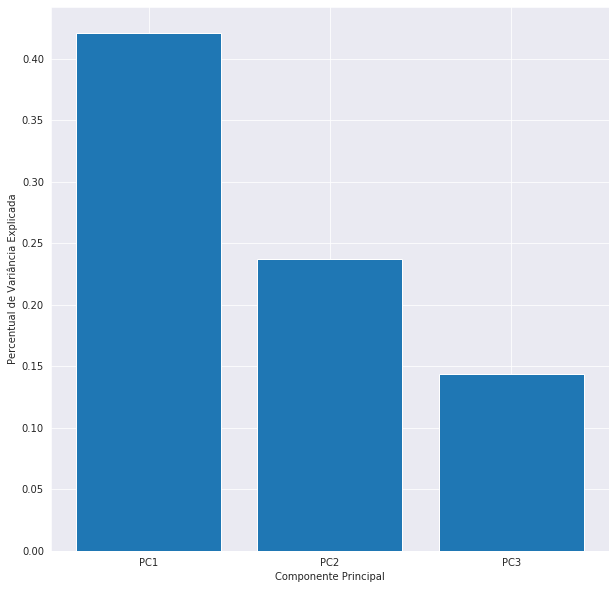

In [43]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,10))
plt.bar(['PC1','PC2','PC3'],var_ratio)
plt.xlabel('Componente Principal')
plt.ylabel('Percentual de Variância Explicada')

Código para Download dos Resultados:

In [0]:
pca_values.to_csv('./pca_values_08-19.csv')
pca_components.to_csv('./pca_components_08-19.csv')

In [0]:
from google.colab import files
#files.download('pca_values_08-19.csv')
#files.download('pca_components_08-19.csv')

## Aplicação do PCA Calculado ao dia 19-08-2019

Dataset de 2019, pré-processado e com Group By por Id e Date, com operação de Média:

In [46]:
X = df_2019_pre_gp.groupby(['id','date']).mean()
X

cc  evap    n  ...         wd       ws    wsmax
id    date                         ...                             
82024 08-01   6.250000   NaN  9.6  ...  11.500000  0.51444  0.51444
      08-02   6.250000   NaN  5.1  ...   2.500000  2.05776  1.02888
      08-03   9.375000   NaN  NaN  ...   2.500000  0.51444  1.02888
      08-04  10.000000   NaN  5.5  ...  18.000000  1.02888  1.02888
      08-05  10.000000   NaN  0.0  ...  13.666667  1.37184  0.68592
...                ...   ...  ...  ...        ...      ...      ...
83997 08-27   7.666667   0.3  NaN  ...  10.666667      NaN      NaN
      08-28   8.000000   0.7  NaN  ...  11.000000      NaN      NaN
      08-29   3.333333   1.2  NaN  ...  22.666667      NaN      NaN
      08-30   9.666667   2.8  NaN  ...  10.666667      NaN      NaN
      08-31   6.666667   1.0  NaN  ...  15.333333      NaN      NaN

[5409 rows x 15 columns]

Preenchendo Na's com Fills de Dados de uma Mesma Estação, porém com valores de outros dias:

In [0]:
lst_08 = [v for k, v in X.groupby('id')]

In [0]:
X = pd.DataFrame()
for i, df_i_ in enumerate(lst_08):
  df_aux = df_i_.fillna(method='ffill')
  df_aux = df_aux.fillna(method='bfill')
  df_aux = df_aux.fillna(method='ffill')
  X = pd.concat([df_aux,X])

In [49]:
print("List of", type(lst_08[0]), "with length =", len(lst_08))

List of <class 'pandas.core.frame.DataFrame'> with length = 182


In [50]:
X = X.reorder_levels(['date','id']).sort_index()
X

cc  evap     n  ...         wd        ws     wsmax
date  id                            ...                               
08-01 82024   6.250000   NaN   9.6  ...  11.500000  0.514440  0.514440
      82098   6.333333   3.7   8.9  ...   7.666667  1.666667  2.000000
      82106   9.000000   NaN   9.0  ...   4.500000  0.514440  0.514440
      82141   5.000000   0.3  10.5  ...  14.333333  2.733333  2.733333
      82145   4.333333   1.0   9.8  ...  15.000000  0.533333  0.533333
...                ...   ...   ...  ...        ...       ...       ...
08-31 83964   9.333333   1.6   0.9  ...  14.000000       NaN       NaN
      83967  10.000000   2.0   0.0  ...  22.666667  1.266667  2.666667
      83980   7.000000   0.1   6.9  ...  12.333333  3.666667  4.333333
      83985   9.333333   0.5   4.3  ...  17.000000  2.266667  3.433333
      83997   6.666667   1.0   NaN  ...  15.333333       NaN       NaN

[5409 rows x 15 columns]

Filtrando para o dia 19:

In [51]:
X = X.loc['08-19']
X

,cc,evap,n,patm,pnmm,prec,tair,tmax,tmin,tw,ur,urmax,wd,ws,wsmax
id,,,,,,,,,,,,,,,
82024,7.083333,NaN,9.4,NaN,NaN,16.0,28.333333,33.7,22.2,23.400000,78.75,75.666667,9.333333,1.371840,1.028880
82042,7.333333,NaN,NaN,NaN,NaN,6.0,26.666667,34.6,22.4,NaN,85.75,87.666667,1.666667,0.666667,0.666667
82098,5.333333,2.5,9.9,1010.900000,1012.666667,9.2,29.066667,34.0,23.3,26.233333,78.25,79.666667,18.000000,1.000000,0.466667
82106,7.500000,NaN,9.0,NaN,NaN,0.0,25.650000,34.9,20.9,25.500000,88.00,91.500000,7.000000,0.514440,1.543320
82113,3.750000,NaN,10.1,NaN,NaN,0.0,25.500000,34.0,23.9,NaN,90.00,86.500000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83964,1.333333,2.3,9.1,973.900000,1025.300000,0.0,8.466667,16.2,2.0,5.766667,73.75,66.666667,14.000000,NaN,NaN
83967,6.333333,1.8,5.2,1019.500000,1025.366667,0.1,11.866667,14.4,6.7,9.466667,75.75,71.666667,18.333333,2.133333,2.033333
83980,3.000000,2.9,9.5,996.233333,1025.933333,0.0,6.666667,10.2,-0.3,4.733333,68.75,73.000000,14.000000,2.333333,1.666667


Decompondo Wd em coordenadas cartesianas:

In [52]:
X['wd'] = X['wd'].multiply(np.pi/180)
X['wd_cos'] = X['wd'].apply(np.cos)
X['wd_sin'] = X['wd'].apply(np.sin)
X = X.drop('wd',axis=1)
X

,cc,evap,n,patm,pnmm,prec,tair,tmax,tmin,tw,ur,urmax,ws,wsmax,wd_cos,wd_sin
id,,,,,,,,,,,,,,,,
82024,7.083333,NaN,9.4,NaN,NaN,16.0,28.333333,33.7,22.2,23.400000,78.75,75.666667,1.371840,1.028880,0.986762,0.162178
82042,7.333333,NaN,NaN,NaN,NaN,6.0,26.666667,34.6,22.4,NaN,85.75,87.666667,0.666667,0.666667,0.999577,0.029085
82098,5.333333,2.5,9.9,1010.900000,1012.666667,9.2,29.066667,34.0,23.3,26.233333,78.25,79.666667,1.000000,0.466667,0.951057,0.309017
82106,7.500000,NaN,9.0,NaN,NaN,0.0,25.650000,34.9,20.9,25.500000,88.00,91.500000,0.514440,1.543320,0.992546,0.121869
82113,3.750000,NaN,10.1,NaN,NaN,0.0,25.500000,34.0,23.9,NaN,90.00,86.500000,0.000000,0.000000,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83964,1.333333,2.3,9.1,973.900000,1025.300000,0.0,8.466667,16.2,2.0,5.766667,73.75,66.666667,NaN,NaN,0.970296,0.241922
83967,6.333333,1.8,5.2,1019.500000,1025.366667,0.1,11.866667,14.4,6.7,9.466667,75.75,71.666667,2.133333,2.033333,0.949243,0.314545
83980,3.000000,2.9,9.5,996.233333,1025.933333,0.0,6.666667,10.2,-0.3,4.733333,68.75,73.000000,2.333333,1.666667,0.970296,0.241922


Preenchendo NaN's da coluna Evap com 0's, e em seguida removendo linhas com NaN's ainda remanescentes:

In [53]:
X['evap'] = X['evap'].fillna(0)
X = X.dropna()
X

,cc,evap,n,patm,pnmm,prec,tair,tmax,tmin,tw,ur,urmax,ws,wsmax,wd_cos,wd_sin
id,,,,,,,,,,,,,,,,
82098,5.333333,2.5,9.9,1010.900000,1012.666667,9.2,29.066667,34.0,23.3,26.233333,78.25,79.666667,1.000000,0.466667,0.951057,0.309017
82141,6.000000,0.4,9.4,1011.850000,1013.200000,0.0,30.300000,32.0,23.5,26.700000,87.50,75.000000,1.633333,2.450000,0.945519,0.325568
82145,3.666667,0.7,8.3,1009.000000,1013.233333,2.0,27.866667,32.4,21.3,25.833333,88.25,86.000000,0.733333,0.733333,0.971687,0.236273
82181,3.500000,10.0,10.5,1001.650000,1014.500000,0.0,30.350000,33.4,22.2,25.200000,66.50,65.000000,1.700000,1.400000,0.999391,0.034899
82184,4.666667,3.4,10.2,1012.100000,1013.866667,0.0,30.333333,34.4,25.3,26.233333,71.25,71.333333,0.766667,0.733333,0.976921,0.213599
82188,5.000000,0.0,10.3,1012.366667,1015.500000,0.0,29.600000,34.4,23.3,25.900000,79.75,79.666667,0.342960,0.342960,0.999577,0.029085
82198,5.666667,4.3,7.3,1009.200000,1014.366667,0.0,28.933333,33.5,23.9,25.600000,78.75,75.666667,2.633333,2.100000,0.987688,0.156434
82212,2.916667,0.0,9.5,1004.333333,1012.466667,0.0,28.600000,34.7,23.0,25.300000,90.75,93.333333,0.685920,0.685920,0.999577,0.029085
82246,7.333333,2.8,8.2,994.100000,1013.966667,10.2,27.833333,33.4,22.0,26.166667,89.75,87.333333,1.100000,0.766667,0.989442,0.144932


Aplicando o Dataset resultante ao PCA calculado anteriormente:

In [0]:
pc1_2019 = sc.fit_transform(X.values)
pc1_2019 = pca.transform(pc1_2019)
pc1_2019 = pd.DataFrame(pc1_2019,index=X.index)

Adicionando Latitudes e Longitudes:

In [55]:
pc1_2019 = pc1_2019.merge(df_m,on='id')
pc1_2019 = pc1_2019.drop(['alt','name','state','uf','time_zone','offset_utc','time_zone.1','offset_utc.1'],axis=1)
pc1_2019

,id,0,1,2,lon,lat
0,82098,-0.519376,2.422612,0.173939,-51.116667,-0.050000
1,82141,-0.218598,2.164525,1.385208,-48.516667,-0.733333
2,82145,-0.295781,2.678700,-0.466718,-46.900000,-1.066667
3,82181,-3.238190,0.427667,0.293742,-54.083333,-2.000000
4,82184,-1.847400,1.761225,-0.159280,-52.233333,-1.733333
5,82188,-1.240919,2.941913,-1.296755,-50.483333,-1.683333
6,82198,-1.102110,1.825536,1.196013,-45.366667,-1.566667
7,82212,-1.014055,3.357782,-1.093666,-66.166667,-2.533333
8,82246,0.098334,3.290029,-0.221170,-54.950000,-2.633333
9,82263,-1.828581,2.429153,0.199840,-49.500000,-2.250000


Código para Download dos Resultados:

In [0]:
pc1_2019.to_csv('./pc1_2019.csv')
from google.colab import files
#files.download('pc1_2019.csv')